In [22]:
import pandas as pd
import numpy as np

In [23]:
name_column=['id','entity','target','Tweet']

Data = pd.read_csv("Dataset2/twitter_training.csv", names = name_column, nrows=5000 )
Data

,id,entity,target,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
4995,58,Amazon,Neutral,@OregonChai did finally stop making the sugar ...
4996,58,Amazon,Neutral,@OregonChai What did y ’ all really stop makin...
4997,58,Amazon,Neutral,@OregonChai did y’all stop making the butter<u...
4998,59,Amazon,Neutral,Amazon UK launches the Sherlock Holmes Advent ...


In [24]:
Data.dropna(inplace=True)

In [25]:
Data = Data[["Tweet", "target"]]

# Text Normalization

In [41]:
import re
import nltk
import emoji
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata


# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\laptop
[nltk_data]     zone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\laptop
[nltk_data]     zone\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\laptop
[nltk_data]     zone\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [42]:
def preprocess(text):
    text = str(text).lower().strip()

    text = text.replace('%', ' percent')
    text = text.replace('$', ' dollar ')
    text = text.replace('₹', ' rupee ')
    text = text.replace('€', ' euro ')
    text = text.replace('@', ' at ')

    text = emoji.replace_emoji(text, replace='')

    text = text.replace(',000,000,000 ', 'b ')
    text = text.replace(',000,000 ', 'm ')
    text = text.replace(',000 ', 'k ')
    text = re.sub(r'([0-9]+)000000000', r'\1b', text)
    text = re.sub(r'([0-9]+)000000', r'\1m', text)
    text = re.sub(r'([0-9]+)000', r'\1k', text)

    contractions = { 
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "im": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }

   
    text_decontracted = []
    for word in text.split():
        word = contractions.get(word, word)
        text_decontracted.append(word)

    text = ' '.join(text_decontracted)
    text = text.replace("'ve", " have")
    text = text.replace("n't", " not")
    text = text.replace("'re", " are")
    text = text.replace("'ll", " will")
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


   
    text = BeautifulSoup(text, "html.parser").get_text()

   
    text = re.sub(r'\W', ' ', text).strip()

    return text


In [44]:
Data["Tweet"].apply(preprocess)

0       i am getting on borderlands and i will murder ...
1       i am coming to the borders and i will kill you...
2       i am getting on borderlands and i will kill yo...
3       i am coming on borderlands and i will murder y...
4       i am getting on borderlands 2 and i will murde...
                              ...                        
4995    at oregonchai did finally stop making the suga...
4996    at oregonchai what did y all really stop makin...
4997    at oregonchai did y all stop making the butter...
4998    amazon uk launches the sherlock holmes advent ...
4999    amazon uk launches the sherlock holmes advent ...
Name: Tweet, Length: 4952, dtype: object

In [30]:
Data.columns

Index(['Tweet', 'target'], dtype='object')

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Sentiment')

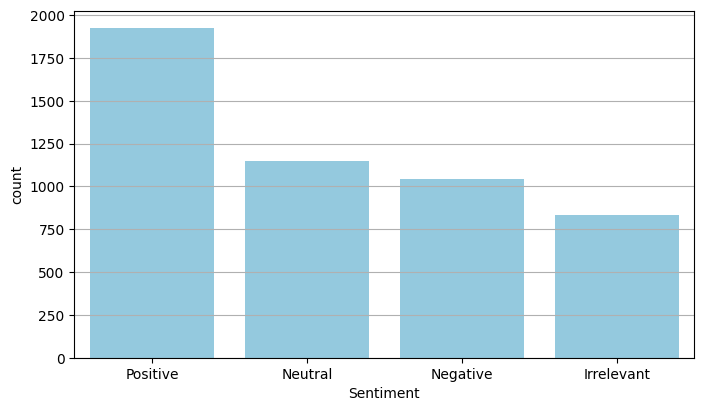

In [32]:
plt.figure(figsize=(8,4.5))
sns.countplot(data=Data, x='target', color="Skyblue")
plt.grid(axis='y')
plt.xlabel("Sentiment")


#  Feature Engineering

In [33]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score

In [34]:
Data['target'] = Data['target'].replace({'Irrelevant': 0, 'Negative':1,'Neutral':2, 'Positive':3}) 
tf=TfidfVectorizer(max_features=5000)
x=tf.fit_transform(Data['Tweet'])
y=Data['target']

C:\Users\laptop zone\AppData\Local\Temp\ipykernel_12968\629725724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['target'] = Data['target'].replace({'Irrelevant': 0, 'Negative':1,'Neutral':2, 'Positive':3})


In [ ]:
x=tf.fit_transform(Data['Tweet'])
y=Data['target']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [36]:
models = {
    'Random Forest': RandomForestClassifier(), 
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
}

In [37]:
best_model  = None
Best_acc = 0.0
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc_score})

    print(f"{name}....\n")
    if acc_score > Best_acc:
        Best_acc = acc_score
        best_model = model

best_model_d = pd.DataFrame(results)



Random Forest....

Gradient Boosting....

Extra Trees....

AdaBoostClassifier....

DecisionTreeClassifier....

XGBClassifier....

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14665
[LightGBM] [Info] Number of data points in the train set: 3961, number of used features: 472
[LightGBM] [Info] Start training from score -1.771022
[LightGBM] [Info] Start training from score -1.539015
[LightGBM] [Info] Start training from score -1.481857
[LightGBM] [Info] Start training from score -0.946664
LightGBM....



In [38]:
best_model_d

,Model,Accuracy
0,Random Forest,0.922301
1,Gradient Boosting,0.706357
2,Extra Trees,0.946519
3,AdaBoostClassifier,0.517659
4,DecisionTreeClassifier,0.761857
5,XGBClassifier,0.856710
6,LightGBM,0.847629


C:\Users\laptop zone\AppData\Local\Temp\ipykernel_12968\3538347654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y= best_model_d["Model"], x= best_model_d["Accuracy"],palette="Paired")


<function matplotlib.pyplot.show(close=None, block=None)>

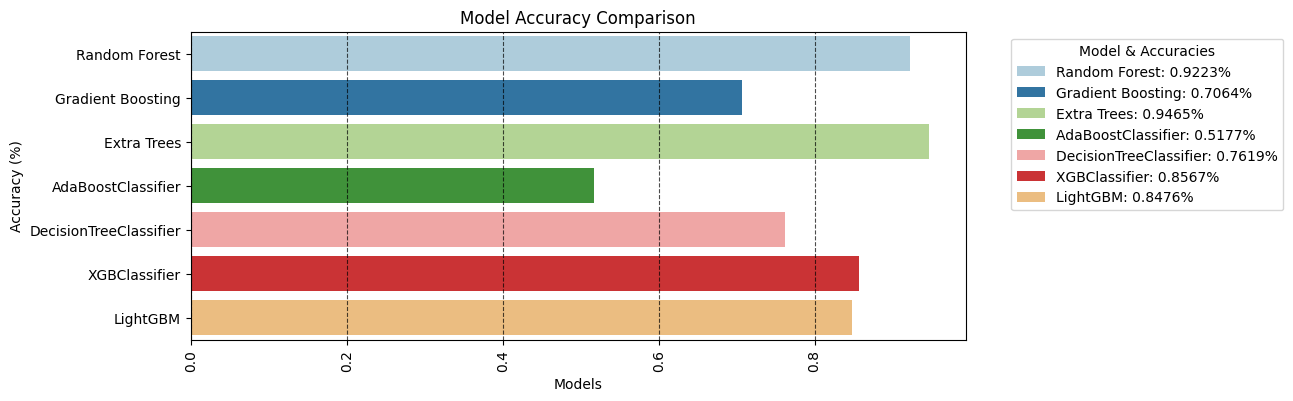

In [39]:
plt.figure(figsize=(10,4))
barplot = sns.barplot(y= best_model_d["Model"], x= best_model_d["Accuracy"],palette="Paired")
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=90)  
plt.grid(axis='x', linestyle='--', alpha=0.7,color="black")

for i, (model, accuracy) in enumerate(zip(best_model_d['Model'], best_model_d['Accuracy'])):
    barplot.patches[i].set_label(f'{model}: {accuracy:.4f}%')

plt.legend(title='Model & Accuracies', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show

In [40]:
print(f"Best Model: {best_model}, Accuracy: {Best_acc}")

Best Model: ExtraTreesClassifier(), Accuracy: 0.9465186680121089


---

**If you found this notebook helpful, please upvote and leave a comment! Your feedback is greatly appreciated.**
<h2 style="text-align: center;">Upvote if you like this notebook!</h2>